<a href="https://colab.research.google.com/github/MeenTers/VDAS_Project/blob/main/compare_views.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch
from torch import nn, load, utils
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms, models
from torchvision.models.vgg import model_urls
from os import path, listdir
model_urls['vgg19'] = model_urls['vgg19'].replace('https://', 'http://')

In [3]:
from scipy.spatial import distance_matrix
from scipy.spatial import distance
import pandas as pd

In [4]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

# VGG model

In [5]:
class VGG:
	def __init__(self):
		model = models.vgg19(pretrained=True, progress=True)
		model.classifier = nn.Sequential(*list(model.classifier.children())[:3])
		self.model = model.cuda().eval()

	def __call__(self, x):
		return self.model(x)

In [6]:
vgg = VGG()

Downloading: "http://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

# Create Features Extraction Function

In [7]:
def get_features(model, loader):
    features = []
    with torch.no_grad():
        for batch, _ in tqdm(loader):
            if torch.cuda.is_available():
                batch = batch.cuda()
            b_features = model(batch).detach().cpu().numpy()
            for f in b_features:
                features.append(f)

    return features

## Create Loading the data Function

In [8]:
def get_dataset(images_path):
  transform = transforms.Compose([
    transforms.Resize(size=32),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
  ])

  dataset = datasets.ImageFolder(images_path, transform=transform)
  loader = utils.data.DataLoader(dataset, batch_size=100, shuffle=False, num_workers=1, pin_memory=True)
  return dataset, loader

## Install Font TH-SARABUN

In [9]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [10]:
# !pip install -U --pre matplotlib  
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

## Create Compute Distance Function

In [11]:
def get_euclidean(base_car,diff_view):
    A = []
    for i in range(len(diff_view)):
        x = distance.euclidean(base_car[i],diff_view[i])
        A.append(x)
    return(A)

# กันชนหน้ารถเสียหายเล็กน้อย

In [12]:
car1_dataset , car1_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/Base/Front')
dmg1_dataset , dmg1_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/dmg/front/little dmg1')

In [13]:
id1b = get_features(vgg,car1_loader)
id1v = get_features(vgg,dmg1_loader)

100%|██████████| 1/1 [00:01<00:00,  1.10s/it]


In [14]:
id1 = get_euclidean(id1b,id1v)
id1

[32.031009674072266, 2.6256866455078125, 10.461527824401855]

In [15]:
id1f = cv2.imread('/content/drive/MyDrive/Test Dist/Base/Front/base of front/ID1F.png')
id1dmgf = cv2.imread('/content/drive/MyDrive/Test Dist/dmg/front/little dmg1/test1/ID1dmg1.png')
id2f = cv2.imread('/content/drive/MyDrive/Test Dist/Base/Front/base of front/ID2F.png')
id2dmgf = cv2.imread('/content/drive/MyDrive/Test Dist/dmg/front/little dmg1/test1/ID2dmg1.png')

Text(150, 450, 'Distance = 2.626')

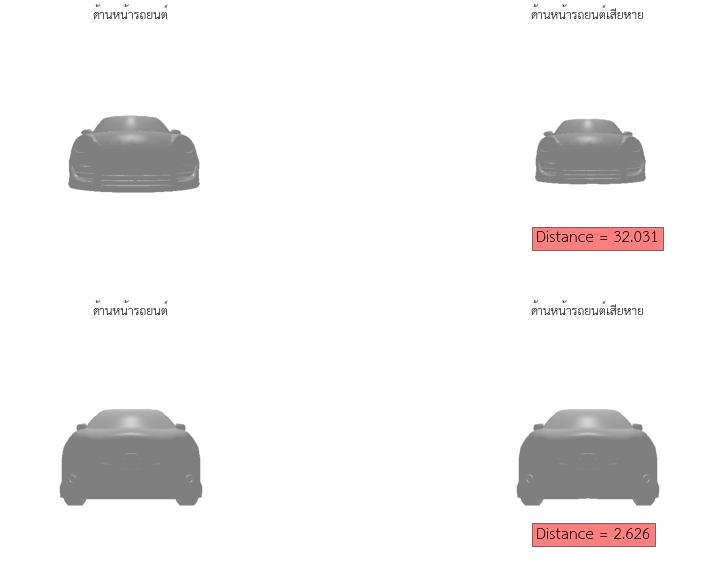

In [16]:
# create figure
fig = plt.figure(figsize=(15, 10))
  # setting values to rows and column variables
rows = 2
columns = 2
  # Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  # showing image
plt.imshow(id1f)
plt.axis('off')
plt.title('ด้านหน้ารถยนต์')

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)  
# showing image
plt.imshow(id1dmgf)
plt.axis('off')
plt.title('ด้านหน้ารถยนต์เสียหาย')
plt.text(150,450,'Distance = '+str(round(id1[0],3)),fontsize = 15,bbox = dict(facecolor = 'red', alpha = 0.5))
        
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  # showing image
plt.imshow(id2f)
plt.axis('off')
plt.title('ด้านหน้ารถยนต์')

  # Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  # showing image
plt.imshow(id2dmgf)
plt.axis('off')
plt.title('ด้านหน้ารถยนต์เสียหาย')
plt.text(150,450,'Distance = '+str(round(id1[1],3)),fontsize = 15,bbox = dict(facecolor = 'red', alpha = 0.5))

# กระจกด้านซ้ายเสียหายเล็กน้อย

In [17]:
car2_dataset , car2_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/Base/Front')
dmg2_dataset , dmg2_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/dmg/front/little dmg2')

In [18]:
id2b = get_features(vgg,car2_loader)
id2v = get_features(vgg,dmg2_loader)

100%|██████████| 1/1 [00:01<00:00,  1.18s/it]


In [19]:
id2 = get_euclidean(id2b,id2v)
id2

[0.2577701210975647, 2.229651689529419, 1.2907428741455078]

In [20]:
id1f = cv2.imread('/content/drive/MyDrive/Test Dist/Base/Front/base of front/ID1F.png')
id1dmgf = cv2.imread('/content/drive/MyDrive/Test Dist/dmg/front/little dmg2/test1/ID1dmg2.png')
id2f = cv2.imread('/content/drive/MyDrive/Test Dist/Base/Front/base of front/ID2F.png')
id2dmgf = cv2.imread('/content/drive/MyDrive/Test Dist/dmg/front/little dmg2/test1/ID2dmg2.png')

Text(150, 450, 'Distance = 2.23')

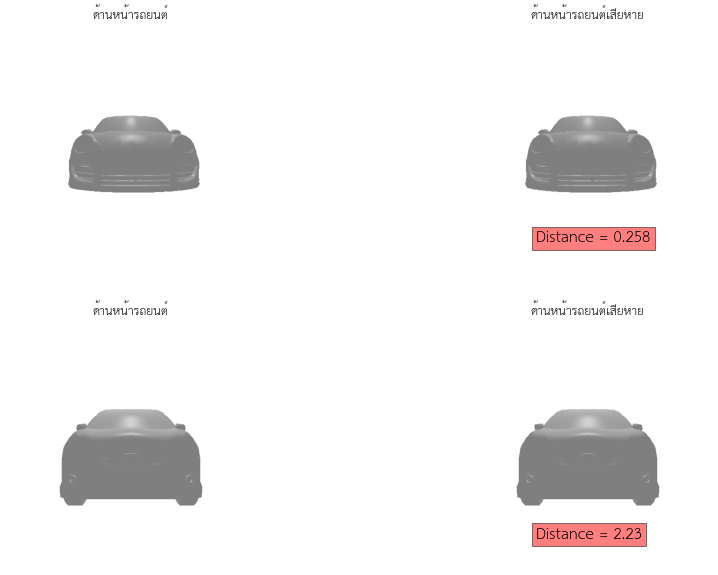

In [21]:
# create figure
fig = plt.figure(figsize=(15, 10))
  # setting values to rows and column variables
rows = 2
columns = 2
  # Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  # showing image
plt.imshow(id1f)
plt.axis('off')
plt.title('ด้านหน้ารถยนต์')

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)  
# showing image
plt.imshow(id1dmgf)
plt.axis('off')
plt.title('ด้านหน้ารถยนต์เสียหาย')
plt.text(150,450,'Distance = '+str(round(id2[0],3)),fontsize = 15,bbox = dict(facecolor = 'red', alpha = 0.5))
        
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  # showing image
plt.imshow(id2f)
plt.axis('off')
plt.title('ด้านหน้ารถยนต์')

  # Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  # showing image
plt.imshow(id2dmgf)
plt.axis('off')
plt.title('ด้านหน้ารถยนต์เสียหาย')
plt.text(150,450,'Distance = '+str(round(id2[1],3)),fontsize = 15,bbox = dict(facecolor = 'red', alpha = 0.5))

# กันชนด้านหลังเสียหายเล็กน้อย

In [22]:
car3_dataset , car3_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/Base/back')
dmg3_dataset , dmg3_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/dmg/front/little dmgb1')

In [23]:
id3b = get_features(vgg,car3_loader)
id3v = get_features(vgg,dmg3_loader)

100%|██████████| 1/1 [00:01<00:00,  1.19s/it]


In [24]:
id3 = get_euclidean(id3b,id3v)
id3

[0.0, 0.0, 0.0]

# ฝากระโปรงด้านหลังเสียหายเล็กน้อย

In [25]:
car4_dataset , car4_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/Base/back')
dmg4_dataset , dmg4_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/dmg/back/little dmgb2')

In [26]:
id4b = get_features(vgg,car4_loader)
id4v = get_features(vgg,dmg4_loader)

100%|██████████| 1/1 [00:01<00:00,  1.05s/it]


In [27]:
id4 = get_euclidean(id4b,id4v)
id4

[3.368466854095459, 0.0, 0.517829954624176]

# บังโคลนด้านหน้าฝั่งขวาเสียหายเล็กน้อย

In [28]:
car5_dataset , car5_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/Base/Right')
dmg5_dataset , dmg5_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/dmg/right/little dmgr1')

In [29]:
id5b = get_features(vgg,car5_loader)
id5v = get_features(vgg,dmg5_loader)

100%|██████████| 1/1 [00:01<00:00,  1.18s/it]


In [30]:
id5 = get_euclidean(id5b,id5v)
id5

[0.9874580502510071, 1.4035791158676147, 8.292835235595703]

# บังโคลนด้านหลังฝั่งขวาเสียหายเล็กน้อย

In [31]:
car6_dataset , car6_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/Base/Right')
dmg6_dataset , dmg6_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/dmg/right/little dmgr2')

In [32]:
id6b = get_features(vgg,car6_loader)
id6v = get_features(vgg,dmg6_loader)

100%|██████████| 1/1 [00:01<00:00,  1.26s/it]


In [33]:
id6 = get_euclidean(id6b,id6v)
id6

[0.816369891166687, 6.181356430053711, 5.075022220611572]

# บังโคลนด้านหน้าฝั่งซ้ายเสียหายเล็กน้อย

In [34]:
car7_dataset , car7_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/Base/Left')
dmg7_dataset , dmg7_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/dmg/left/little dmgl1')

In [35]:
id7b = get_features(vgg,car7_loader)
id7v = get_features(vgg,dmg7_loader)

100%|██████████| 1/1 [00:01<00:00,  1.17s/it]


In [36]:
id7 = get_euclidean(id7b,id7v)
id7

[1.3238294124603271, 1.678946852684021, 4.118788242340088]

# บังโคลนด้านหลังฝั่งซ้ายเสียหายเล็กน้อย

In [37]:
car8_dataset , car8_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/Base/Left')
dmg8_dataset , dmg8_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/dmg/left/little dmgl2')

In [38]:
id8b = get_features(vgg,car8_loader)
id8v = get_features(vgg,dmg8_loader)

100%|██████████| 1/1 [00:01<00:00,  1.43s/it]


In [39]:
id8 = get_euclidean(id8b,id8v)
id8

[0.9240785837173462, 6.846311569213867, 4.582939147949219]

# กระจกขวาด้านหน้าเสียหายเล็กน้อย

In [40]:
car9_dataset , car9_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/Base/Front')
dmg9_dataset , dmg9_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/dmg/front/little dmg3')

In [41]:
id9b = get_features(vgg,car9_loader)
id9v = get_features(vgg,dmg9_loader)

100%|██████████| 1/1 [00:01<00:00,  1.44s/it]


In [42]:
id9 = get_euclidean(id9b,id9v)
id9

[21.875459671020508, 31.078048706054688, 28.03401756286621]

# กันชนด้านหน้าเสียหายปานกลาง

In [43]:
car10_dataset , car10_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/Base/Front')
dmg10_dataset , dmg10_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/dmg/front/dmg')

In [44]:
id10b = get_features(vgg,car10_loader)
id10v = get_features(vgg,dmg10_loader)

100%|██████████| 1/1 [00:01<00:00,  1.61s/it]


In [45]:
id10 = get_euclidean(id10b,id10v)
id10

[14.140507698059082, 31.835617065429688, 30.751710891723633]

# กันชนด้านหลังเสียหายปานกลาง

In [47]:
car11_dataset , car11_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/Base/back')
dmg11_dataset , dmg11_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/dmg/back/dmg1')

In [48]:
id11b = get_features(vgg,car11_loader)
id11v = get_features(vgg,dmg11_loader)

100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


In [49]:
id11 = get_euclidean(id11b,id11v)
id11

[17.89242935180664, 31.053165435791016, 33.7948112487793]

# บังโคลนด้านหน้าฝั่งขวาเสียหายปานกลาง

In [50]:
car12_dataset , car12_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/Base/Right')
dmg12_dataset , dmg12_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/dmg/right/dmg1')

In [51]:
id12b = get_features(vgg,car12_loader)
id12v = get_features(vgg,dmg12_loader)

100%|██████████| 1/1 [00:01<00:00,  1.36s/it]


In [52]:
id12 = get_euclidean(id12b,id12v)
id12

[7.397725582122803, 29.392316818237305, 27.44955825805664]

# บังโคลนด้านหน้าฝั่งซ้ายเสียหายปานกลาง

In [60]:
car13_dataset , car13_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/Base/Left')
dmg13_dataset , dmg13_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/dmg/left/dmg1')

In [61]:
id13b = get_features(vgg,car13_loader)
id13v = get_features(vgg,dmg13_loader)

100%|██████████| 1/1 [00:01<00:00,  1.47s/it]


In [62]:
id13 = get_euclidean(id13b,id13v)
id13

[7.317038059234619, 28.916051864624023, 36.86963653564453]

# กระจกด้านซ้ายเสียหายปานกลาง

In [64]:
car14_dataset , car14_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/Base/Front')
dmg14_dataset , dmg14_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/dmg/front/dmg2')

In [65]:
id14b = get_features(vgg,car14_loader)
id14v = get_features(vgg,dmg14_loader)

100%|██████████| 1/1 [00:01<00:00,  1.38s/it]


In [66]:
id14 = get_euclidean(id14b,id14v)
id14

[23.089521408081055, 30.734933853149414, 27.86607551574707]

# บังโคลนด้านหลังฝั่งขวาเสียหายปานกลาง

In [68]:
car15_dataset , car15_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/Base/Right')
dmg15_dataset , dmg15_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/dmg/right/dmg2')

In [69]:
id15b = get_features(vgg,car15_loader)
id15v = get_features(vgg,dmg15_loader)

100%|██████████| 1/1 [00:01<00:00,  1.39s/it]


In [70]:
id15 = get_euclidean(id15b,id15v)
id15

[24.002201080322266, 28.224130630493164, 28.804582595825195]

# บังโคลนด้านหลังฝั่งซ้ายเสียหายปานกลาง

In [75]:
car16_dataset , car16_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/Base/Left')
dmg16_dataset , dmg16_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/dmg/left/dmg2')

In [76]:
id16b = get_features(vgg,car16_loader)
id16v = get_features(vgg,dmg16_loader)

100%|██████████| 1/1 [00:01<00:00,  1.42s/it]


In [77]:
id16 = get_euclidean(id16b,id16v)
id16

[27.082801818847656, 33.3853759765625, 30.23700714111328]

# ฝากระโปรงด้านหลังเสียหายปานกลาง

In [79]:
car17_dataset , car17_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/Base/back')
dmg17_dataset , dmg17_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/dmg/back/dmg2')

In [80]:
id17b = get_features(vgg,car17_loader)
id17v = get_features(vgg,dmg17_loader)

100%|██████████| 1/1 [00:01<00:00,  1.62s/it]


In [81]:
id17 = get_euclidean(id17b,id17v)
id17

[25.999164581298828, 31.480886459350586, 34.862735748291016]

# กระจกด้านขวาเสียหายปานกลาง

In [82]:
car18_dataset , car18_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/Base/Front')
dmg18_dataset , dmg18_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/dmg/front/dmg3')

In [83]:
id18b = get_features(vgg,car18_loader)
id18v = get_features(vgg,dmg18_loader)

100%|██████████| 1/1 [00:01<00:00,  1.36s/it]


In [84]:
id18 = get_euclidean(id18b,id18v)
id18

[21.84117317199707, 30.76630210876465, 28.172163009643555]

# กันชนด้านหน้าเสียหายหนัก

In [86]:
car19_dataset , car19_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/Base/Front')
dmg19_dataset , dmg19_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/dmg/front/more dmg')

In [87]:
id19b = get_features(vgg,car19_loader)
id19v = get_features(vgg,dmg19_loader)

100%|██████████| 1/1 [00:01<00:00,  1.34s/it]


In [88]:
id19 = get_euclidean(id19b,id19v)
id19

[23.817974090576172, 42.24349594116211, 46.33266830444336]

# กันชนด้านหลังเสียหายหนัก

In [90]:
car20_dataset , car20_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/Base/back')
dmg20_dataset , dmg20_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/dmg/back/most dmg1')

In [91]:
id20b = get_features(vgg,car20_loader)
id20v = get_features(vgg,dmg20_loader)

100%|██████████| 1/1 [00:01<00:00,  1.20s/it]


In [92]:
id20 = get_euclidean(id20b,id20v)
id20

[32.73076629638672, 32.977752685546875, 34.02585220336914]

# บังโคลนด้านหน้าฝั่งขวาเสียหายหนัก

In [93]:
car21_dataset , car21_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/Base/Right')
dmg21_dataset , dmg21_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/dmg/right/most dmg1')

In [94]:
id21b = get_features(vgg,car21_loader)
id21v = get_features(vgg,dmg21_loader)

100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


In [95]:
id21 = get_euclidean(id21b,id21v)
id21

[35.84652328491211, 31.54802894592285, 29.520524978637695]

# บังโคลนด้านหน้าฝั่งซ้ายเสียหายหนัก

In [96]:
car22_dataset , car22_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/Base/Left')
dmg22_dataset , dmg22_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/dmg/left/most dmg1')

In [97]:
id22b = get_features(vgg,car22_loader)
id22v = get_features(vgg,dmg22_loader)

100%|██████████| 1/1 [00:01<00:00,  1.36s/it]


In [98]:
id22 = get_euclidean(id22b,id22v)
id22

[50.92572784423828, 28.41098403930664, 34.527320861816406]

# กระจกด้านซ้ายเสียหายหนัก

In [99]:
car23_dataset , car23_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/Base/Front')
dmg23_dataset , dmg23_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/dmg/front/most dmg2')

In [100]:
id23b = get_features(vgg,car23_loader)
id23v = get_features(vgg,dmg23_loader)

100%|██████████| 1/1 [00:01<00:00,  1.32s/it]


In [101]:
id23 = get_euclidean(id23b,id23v)
id23

[24.47780418395996, 26.059368133544922, 29.807069778442383]

# บังโคลนด้านหลังฝั่งขวาเสียหายหนัก

In [102]:
car24_dataset , car24_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/Base/Right')
dmg24_dataset , dmg24_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/dmg/right/most dmg2')

In [103]:
id24b = get_features(vgg,car24_loader)
id24v = get_features(vgg,dmg24_loader)

100%|██████████| 1/1 [00:01<00:00,  1.36s/it]


In [104]:
id24 = get_euclidean(id24b,id24v)
id24

[24.610713958740234, 26.426740646362305, 29.123266220092773]

# บังโคลนด้านหลังฝั่งซ้ายสียหายหนัก

In [105]:
car25_dataset , car25_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/Base/Left')
dmg25_dataset , dmg25_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/dmg/left/most dmg2')

In [106]:
id25b = get_features(vgg,car25_loader)
id25v = get_features(vgg,dmg25_loader)

100%|██████████| 1/1 [00:01<00:00,  1.33s/it]


In [107]:
id25 = get_euclidean(id25b,id25v)
id25

[27.710092544555664, 24.895465850830078, 29.28241729736328]

# ฝากระโปรงด้านหลังเสียหายหนัก

In [108]:
car26_dataset , car26_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/Base/back')
dmg26_dataset , dmg26_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/dmg/back/most dmg2')

In [109]:
id26b = get_features(vgg,car26_loader)
id26v = get_features(vgg,dmg26_loader)

100%|██████████| 1/1 [00:01<00:00,  1.38s/it]


In [110]:
id26 = get_euclidean(id26b,id26v)
id26

[47.90445327758789, 32.01901626586914, 36.67692947387695]